### Different loss functions supported by SGD

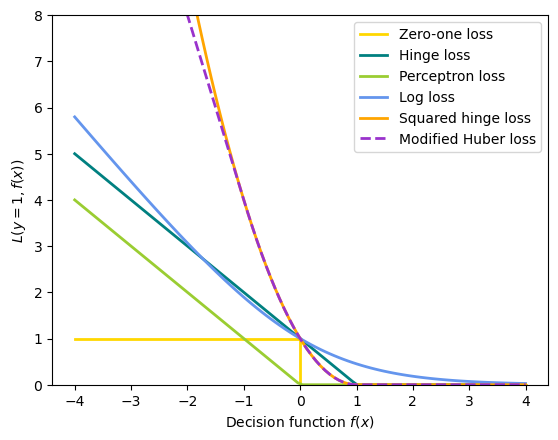

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="gold", lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=lw, label="Log loss")
plt.plot(
    xx,
    np.where(xx < 1, 1 - xx, 0) ** 2,
    color="orange",
    lw=lw,
    label="Squared hinge loss",
)
plt.plot(
    xx,
    modified_huber_loss(xx, 1),
    color="darkorchid",
    lw=lw,
    linestyle="--",
    label="Modified Huber loss",
)
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

### 1. Choose what problem you want to solve
### 2. Find data
### 3. Explore
### 4. Prepare

In [2]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

### 5. Choose your Pokemon - yyy I mean model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [7]:
X = iris.data
y = iris.target

### 6. Train model on the data

In [8]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the model

In [9]:
print(knn.predict([[4.9,3.,1.4,0.2]]))

[0]


### All good but we don't know how it will perform well on new data

### Introducing train test split!

In [10]:
from sklearn.model_selection import train_test_split

knn2 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=20)

In [11]:
print(X_test.shape, X_train.shape)

(38, 4) (112, 4)


In [12]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
predictions = knn2.predict(X_test)
print(predictions)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 2 1 1 0 2 1 1 1 0 0 0 1 1
 0]


In [14]:
print(y_test)

[0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2 1 1 0 0 0 2 1
 0]


### We can compare two arrays manually, but it doesn't seem handy

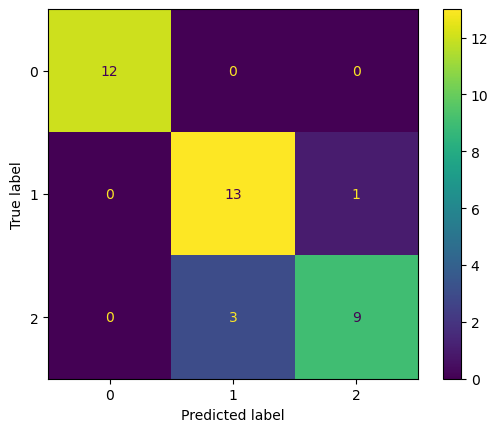

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn2, X_test, y_test)
plt.show()

In [16]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8947368421052632


In [17]:
precision = metrics.precision_score(y_test, predictions, average=None)
print(precision)
precision_all = metrics.precision_score(y_test, predictions, average='micro')
print(precision_all)

[1.     0.8125 0.9   ]
0.8947368421052632


In [18]:
recall = metrics.recall_score(y_test, predictions, average=None)
print(recall)
recall_all = metrics.recall_score(y_test, predictions, average='micro')
print(recall_all)

[1.         0.92857143 0.75      ]
0.8947368421052632


### We can also use classification_report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      0.93      0.87        14
   virginica       0.90      0.75      0.82        12

    accuracy                           0.89        38
   macro avg       0.90      0.89      0.89        38
weighted avg       0.90      0.89      0.89        38



#### support - the value in the classification report that refers to the number of occurrences of each class in the true labels.

In [20]:
print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))

1.0
0.8947368421052632


### AUC-ROC curve

In [21]:
probs = knn2.predict_proba(X_test)

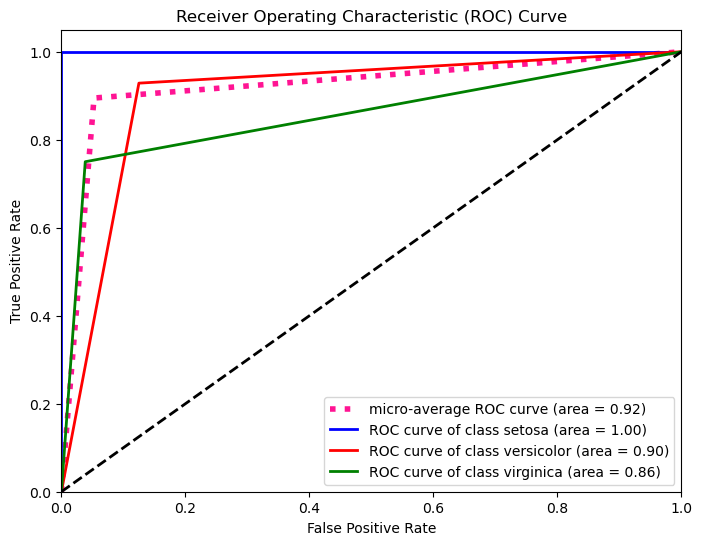

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.eye(3)[y_test].ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['blue', 'red', 'green']
for i, color in zip(range(len(iris.target_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### AUC-ROC score

In [23]:
from sklearn.metrics import roc_auc_score

ar_score = roc_auc_score(y_test, knn2.predict_proba(X_test), multi_class='ovr')
ar_score

0.9191849816849818